In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [3]:
dataset = dataset.iloc[:, 2:]
dataset.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0


In [4]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

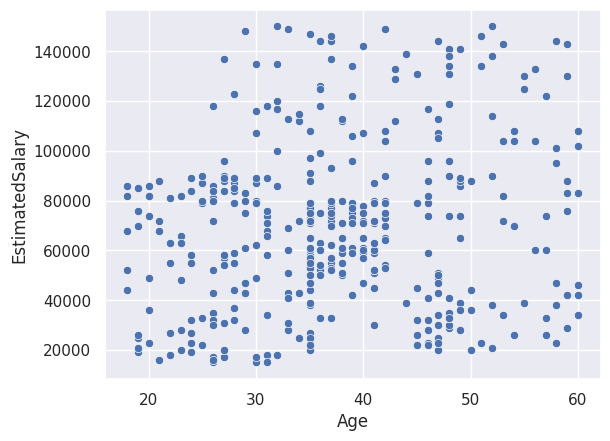

In [5]:
sns.scatterplot(x= dataset['Age'], y=dataset['EstimatedSalary'])
plt.show()

In [6]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
# Case1 --> MLP model without feature scaling

In [8]:
x = dataset.iloc[:, 0:2]
y = dataset.iloc[:, -1]

In [9]:
x.head()

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [39]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [40]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               384       
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(x, y, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 3s 37ms/step - loss: 89.4515 - accuracy: 0.5562 - val_loss: 1.0478 - val_accuracy: 0.6375
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 105.2090 - accuracy: 0.4625 - val_loss: 230.0235 - val_accuracy: 0.3625
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 127.1168 - accuracy: 0.5500 - val_loss: 63.7378 - val_accuracy: 0.3625
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 74.0927 - accuracy: 0.5938 - val_loss: 85.3460 - val_accuracy: 0.3625
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 61.7690 - accuracy: 0.5938 - val_loss: 84.2760 - val_accuracy: 0.3625
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 26.7927 - accuracy: 0.5437 - val_loss: 9.3535 - val_accuracy: 0.6375
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 30.1925 - accuracy: 0.5500 - val_loss: 22.7981 - val_accuracy: 0.63

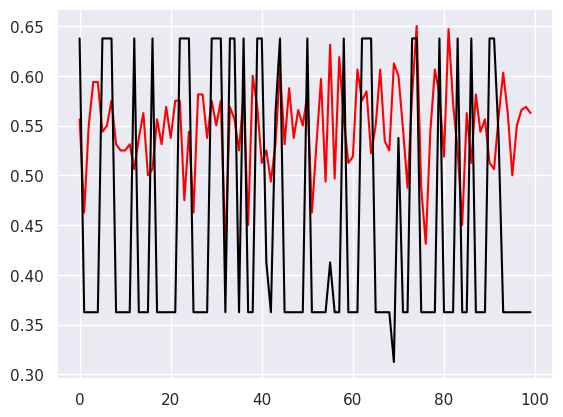

In [16]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='black')

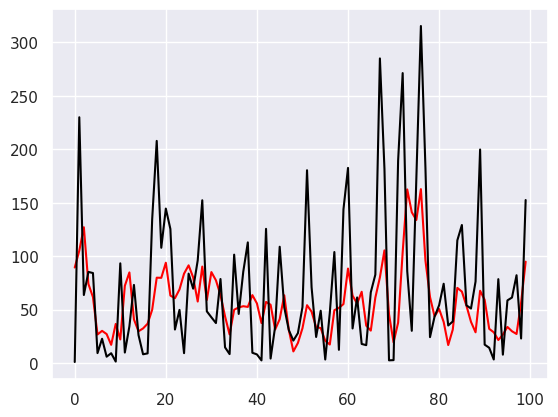

In [17]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='black')

In [18]:
# Case2 ---> MLP with feature scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [42]:
print(pd.DataFrame(x_scaled).head())

          0         1
0  0.586065 -0.455823
1 -1.163068  1.936751
2 -0.634169 -0.741700
3 -0.606565  1.841857
4  0.447123  1.177899


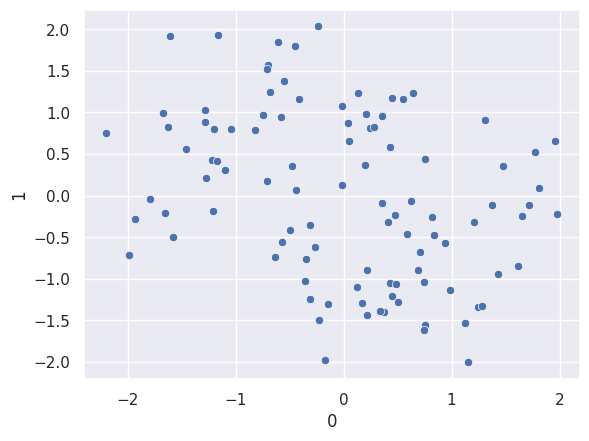

In [43]:
sns.scatterplot(x= pd.DataFrame(x_scaled)[0], y=pd.DataFrame(x_scaled)[1])
plt.show()

In [44]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=2))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               384       
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history1 = model1.fit(x_scaled, y, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 37ms/step - loss: 0.5842 - accuracy: 0.7281 - val_loss: 0.6274 - val_accuracy: 0.7625
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5303 - accuracy: 0.7875 - val_loss: 0.6019 - val_accuracy: 0.8125
Epoch 3/100
10/10 [==============================] - 0s 20ms/step - loss: 0.4864 - accuracy: 0.8000 - val_loss: 0.5814 - val_accuracy: 0.7875
Epoch 4/100
10/10 [==============================] - 0s 23ms/step - loss: 0.4509 - accuracy: 0.8156 - val_loss: 0.5577 - val_accuracy: 0.7625
Epoch 5/100
10/10 [==============================] - 0s 20ms/step - loss: 0.4228 - accuracy: 0.8219 - val_loss: 0.5341 - val_accuracy: 0.7625
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3977 - accuracy: 0.8281 - val_loss: 0.5181 - val_accuracy: 0.7750
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3784 - accuracy: 0.8375 - val_loss: 0.5055 - val_accuracy: 0.8125
Epoch 8/

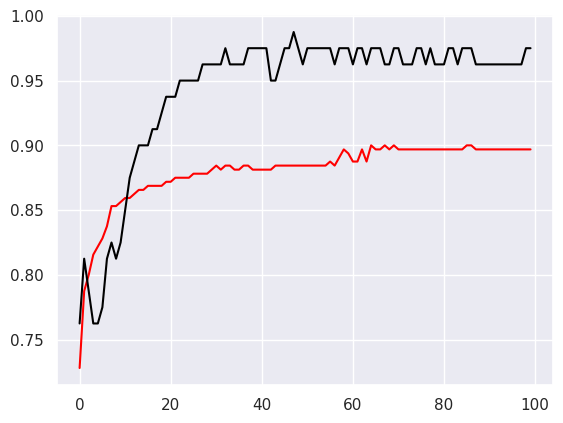

In [28]:
plt.plot(history1.history['accuracy'], color='red')
plt.plot(history1.history['val_accuracy'], color='black')

# Regularization Method

In [46]:
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

In [47]:
x, y = make_moons(100, noise=0.25, random_state=2)

In [48]:
x

array([[ 1.04051282e+00, -2.33491352e-02],
       [-5.54741398e-01,  1.27013832e+00],
       [-7.23715066e-02, -1.77901205e-01],
       [-4.71961272e-02,  1.21883595e+00],
       [ 9.13794475e-01,  8.59883240e-01],
       [ 5.41150127e-01,  6.95140255e-01],
       [ 7.03026094e-01, -2.57985072e-01],
       [-1.33401091e-01,  1.06959481e+00],
       [-1.14287718e-01,  8.97688273e-01],
       [ 1.01150903e+00,  8.49916582e-01],
       [ 2.12537198e+00,  5.08605794e-01],
       [ 1.70010780e+00,  7.16265767e-01],
       [ 1.55439712e+00, -8.60585592e-01],
       [ 5.55027808e-01,  5.76836247e-01],
       [ 1.15481964e+00, -1.43219905e-01],
       [ 2.86145607e-01,  1.32282616e+00],
       [ 4.89545211e-01,  2.91536879e-01],
       [-6.67796665e-01,  7.81730273e-01],
       [ 2.23453555e-01,  3.34602767e-02],
       [ 1.18698241e+00, -3.39029325e-01],
       [-6.08507947e-01,  4.54265298e-01],
       [ 8.29543872e-01,  7.39089646e-01],
       [ 1.13299058e+00, -2.62270185e-01],
       [-1.

In [49]:
y

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

In [50]:
pd.DataFrame(x).describe()

,0,1
count,100.000000,100.000000
mean,0.506007,0.223081
std,0.916620,0.543349
min,-1.498210,-0.860586
25%,-0.119066,-0.238133
50%,0.623499,0.183742
75%,1.138448,0.667427
max,2.308380,1.322826


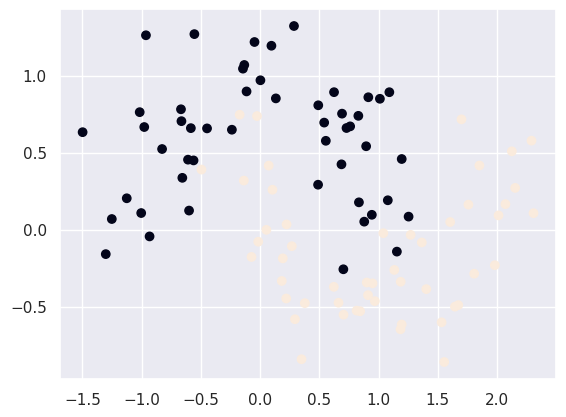

In [51]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [52]:
model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x,y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 83ms/step - loss: 0.7124 - accuracy: 0.3875 - val_loss: 0.6872 - val_accuracy: 0.6500
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6954 - accuracy: 0.5125 - val_loss: 0.6697 - val_accuracy: 0.9000
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6798 - accuracy: 0.6875 - val_loss: 0.6527 - val_accuracy: 0.9000
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6656 - accuracy: 0.7875 - val_loss: 0.6372 - val_accuracy: 0.9000
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6504 - accuracy: 0.8250 - val_loss: 0.6227 - val_accuracy: 0.9000
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6380 - accuracy: 0.8125 - val_loss: 0.6079 - val_accuracy: 0.9000
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6251 - accuracy: 0.8125 - val_loss: 0.5935 - val_accuracy: 0.9000
Epoch 8/100
3/3 [===

9600/9600 [==============================] - 15s 2ms/step


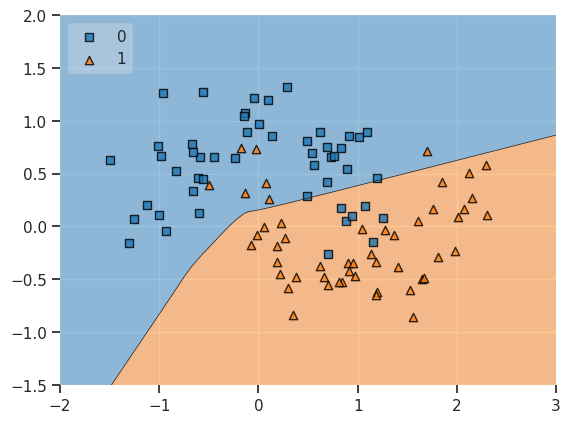

In [53]:
plot_decision_regions(x,y.astype('int'), clf= model, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

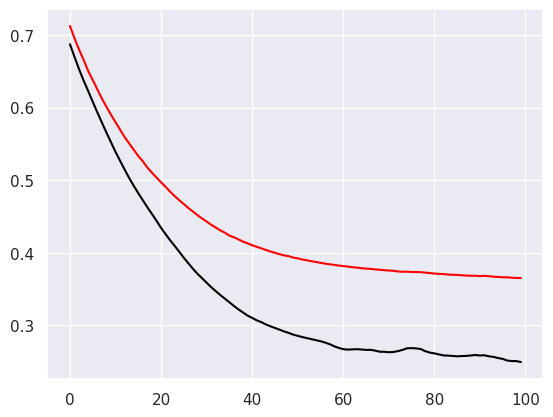

In [54]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='black')

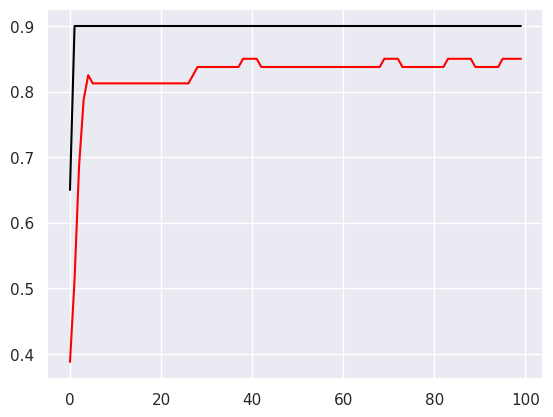

In [56]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='black')

In [61]:
model1 = Sequential()
model1.add(Dense(128, input_dim=2, activation='relu',
                 kernel_regularizer=keras.regularizers.l2(0.01)))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model1.fit(x,y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 85ms/step - loss: 0.7454 - accuracy: 0.4250 - val_loss: 0.7360 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7268 - accuracy: 0.6250 - val_loss: 0.7182 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 23ms/step - loss: 0.7091 - accuracy: 0.7000 - val_loss: 0.7015 - val_accuracy: 0.9000
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6939 - accuracy: 0.8125 - val_loss: 0.6854 - val_accuracy: 0.9000
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6787 - accuracy: 0.8125 - val_loss: 0.6701 - val_accuracy: 0.9000
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6650 - accuracy: 0.8125 - val_loss: 0.6558 - val_accuracy: 0.9000
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6519 - accuracy: 0.8125 - val_loss: 0.6417 - val_accuracy: 0.9000
Epoch 8/100
3/3 [===

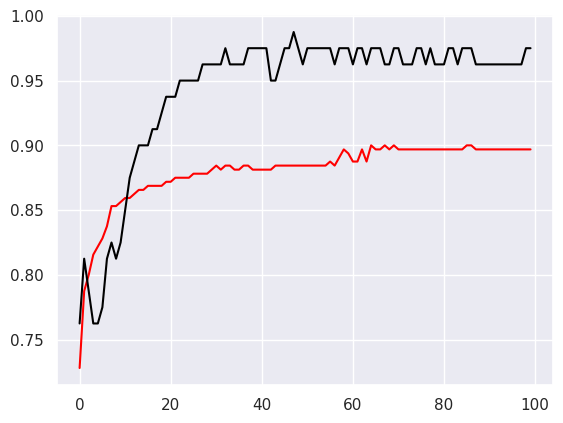

In [63]:
plt.plot(history1.history['accuracy'], color='red')
plt.plot(history1.history['val_accuracy'], color='black')

9600/9600 [==============================] - 15s 2ms/step


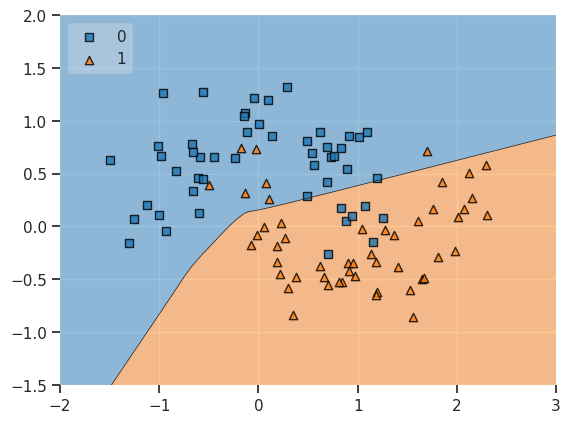

In [64]:
plot_decision_regions(x,y.astype('int'), clf= model, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()